# PLANTILLA EDA

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

## IMPORTAR PAQUETES

In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Cargamos JSON.DATA

In [2]:
# Obtener la ruta del directorio raíz
directorio_raiz = os.getcwd()

# Nombre del archivo JSON
nombre_archivo = "data.json"

# Ruta completa del archivo JSON
ruta_archivo = os.path.join(directorio_raiz, nombre_archivo)

# Abrir el archivo en modo lectura
with open(ruta_archivo, "r") as archivo:
    # Cargar el contenido del archivo JSON
    data = json.load(archivo)

Cargar los datos

- nombre_cat = 'cat_resultado_calidad.pickle'
- nombre_num = 'num_resultado_calidad.pickle'

In [3]:
cat = pd.read_pickle(data['ruta_proyecto']+ '/02_Datos/03_Trabajo/' + data['ruta_cat'])
num = pd.read_pickle(data['ruta_proyecto']+ '/02_Datos/03_Trabajo/' + data['ruta_num'])
df = pd.read_pickle(data['ruta_proyecto']+ '/02_Datos/03_Trabajo/' + data['ruta_trabajo'])

## EDA CATEGÓRICAS

### Análisis estadístico

In [4]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [5]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
2,sex,F,0.304857
1,sex,I,0.330003
0,sex,M,0.365140


### Análisis gráfico

In [6]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

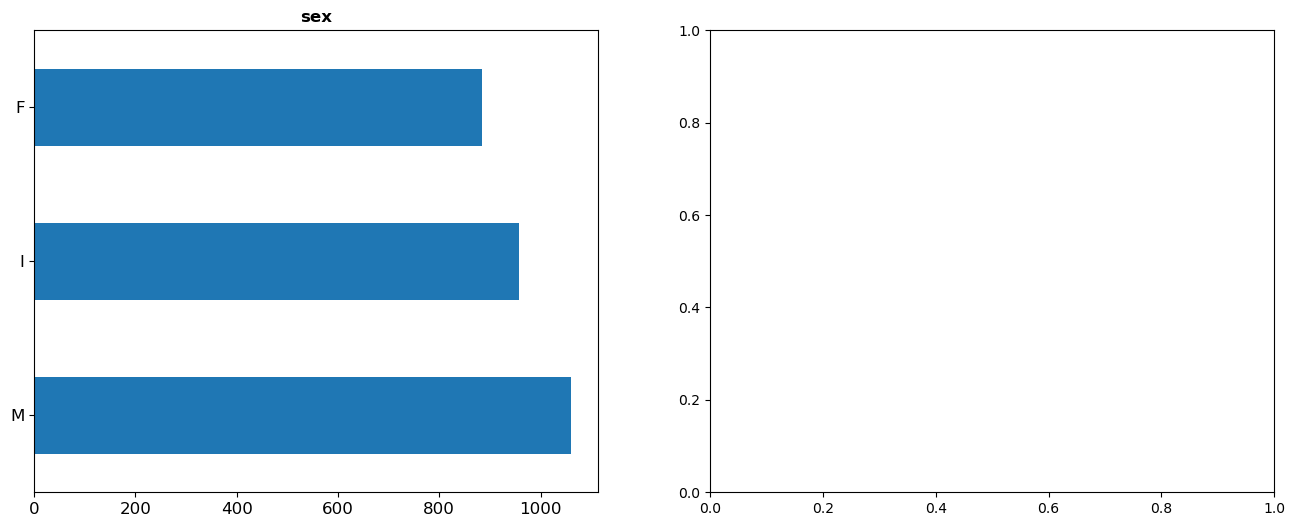

In [7]:
graficos_eda_categoricos(cat)

## EDA NUMÉRICAS

### Análisis estadístico

In [8]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [9]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
length,2903.0,0.521078,0.5400,0.121103,0.0750,0.45000,0.5400,0.61000,0.7800
diameter,2903.0,0.405448,0.4200,0.099987,0.0550,0.34500,0.4200,0.48000,0.6250
height,2903.0,0.138078,0.1400,0.038642,0.0000,0.11000,0.1400,0.16500,0.2400
whole_weight,2903.0,0.818487,0.7865,0.490000,0.0020,0.43200,0.7865,1.14625,2.5550
shucked_weight,2903.0,0.355195,0.3290,0.221522,0.0010,0.18125,0.3290,0.49850,1.2455
viscera_weight,2903.0,0.178734,0.1675,0.109675,0.0005,0.09075,0.1675,0.25250,0.5750
shell_weight,2903.0,0.234539,0.2255,0.136923,0.0015,0.12500,0.2255,0.32200,0.7800
rings,2903.0,9.864967,9.0000,3.132447,1.0000,8.00000,9.0000,11.00000,22.0000
age,2903.0,11.364967,10.5000,3.132447,2.5000,9.50000,10.5000,12.50000,23.5000


### Análisis gráfico

In [10]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 3)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 3, figsize = (16, filas * 4))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

#### Gráfico de Densidad

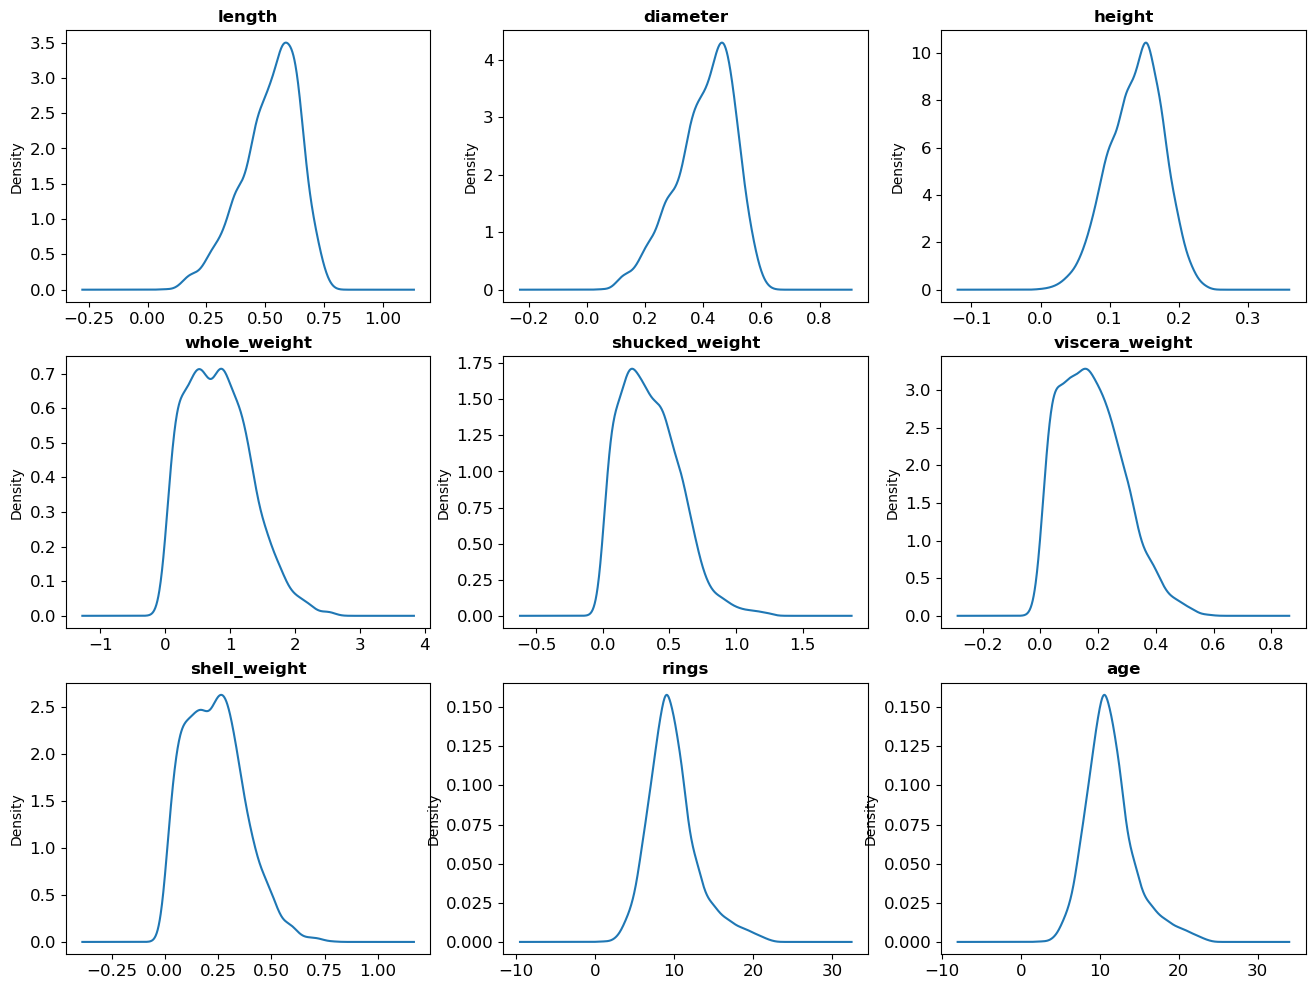

In [11]:
graficos_eda_continuas(num)

#### Gráfico de Distribución y Correlación de las variables

In [12]:
num.corr()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
length,1.000000,0.986637,0.904396,0.925689,0.898582,0.904344,0.905422,0.566259,0.566259
diameter,0.986637,1.000000,0.909942,0.925172,0.893413,0.900974,0.912441,0.581727,0.581727
height,0.904396,0.909942,1.000000,0.890527,0.842725,0.872893,0.894547,0.610340,0.610340
whole_weight,0.925689,0.925172,0.890527,1.000000,0.971049,0.968079,0.958758,0.539485,0.539485
shucked_weight,0.898582,0.893413,0.842725,0.971049,1.000000,0.934160,0.892315,0.429452,0.429452
viscera_weight,0.904344,0.900974,0.872893,0.968079,0.934160,1.000000,0.916260,0.508042,0.508042
shell_weight,0.905422,0.912441,0.894547,0.958758,0.892315,0.916260,1.000000,0.623446,0.623446
rings,0.566259,0.581727,0.610340,0.539485,0.429452,0.508042,0.623446,1.000000,1.000000
age,0.566259,0.581727,0.610340,0.539485,0.429452,0.508042,0.623446,1.000000,1.000000


''

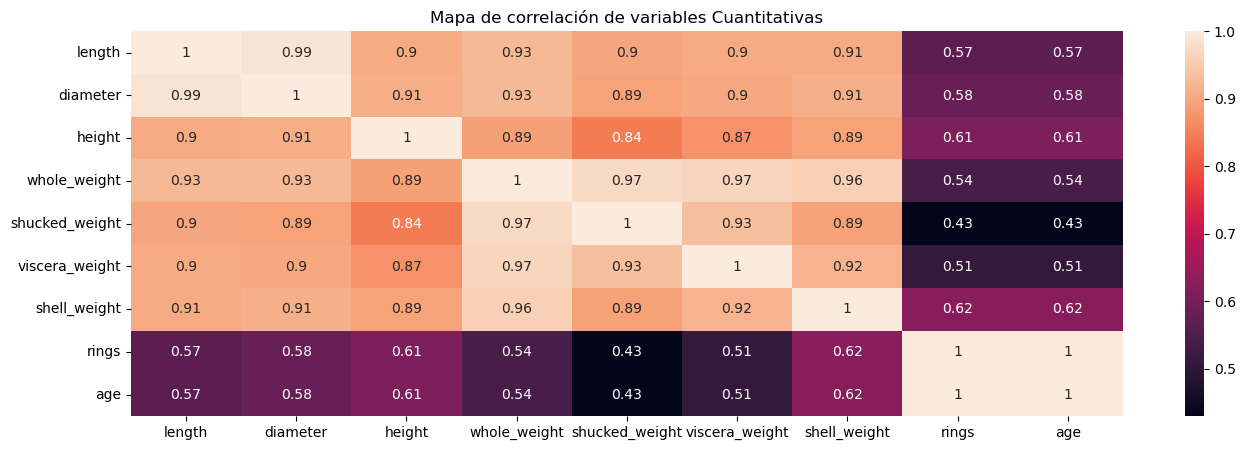

In [13]:
# Heat map

plt.figure(figsize=(16,5))
sns.heatmap(num.corr(), annot = True)
plt.title('Mapa de correlación de variables Cuantitativas')
;

Conclusión:

- Length y diámetro tiene una alta correlación
- whole_weight, shucked_W, viscera_W, shell_w tienen una alta correlación.
- rings se eliminará al formar parte de la target age

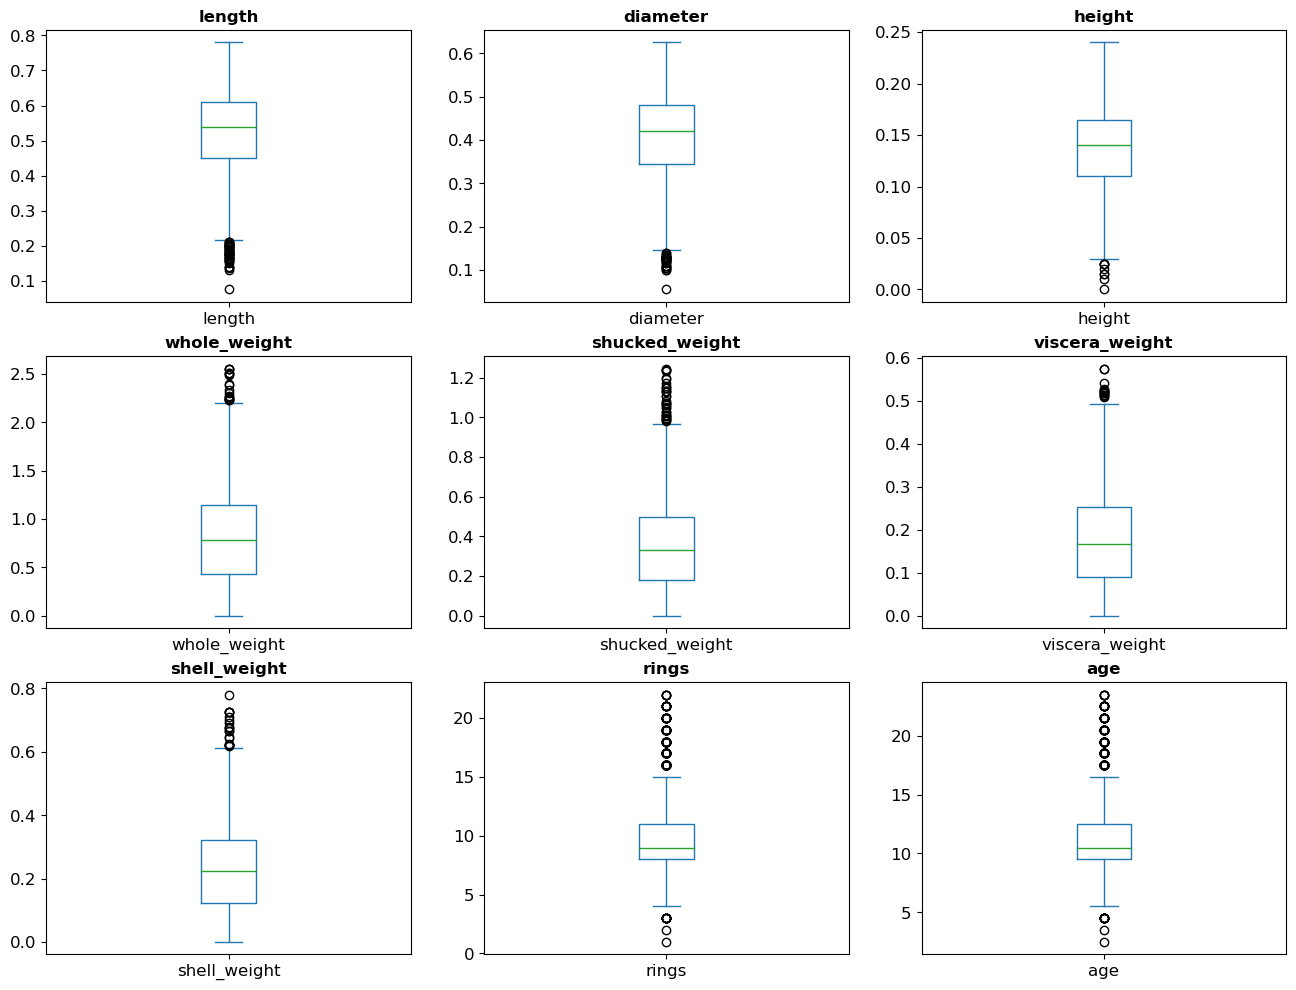

In [14]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 3)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 3, figsize = (16, filas * 4))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.box(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

graficos_eda_continuas(num)

# EDA DATASET DE TRABAJO

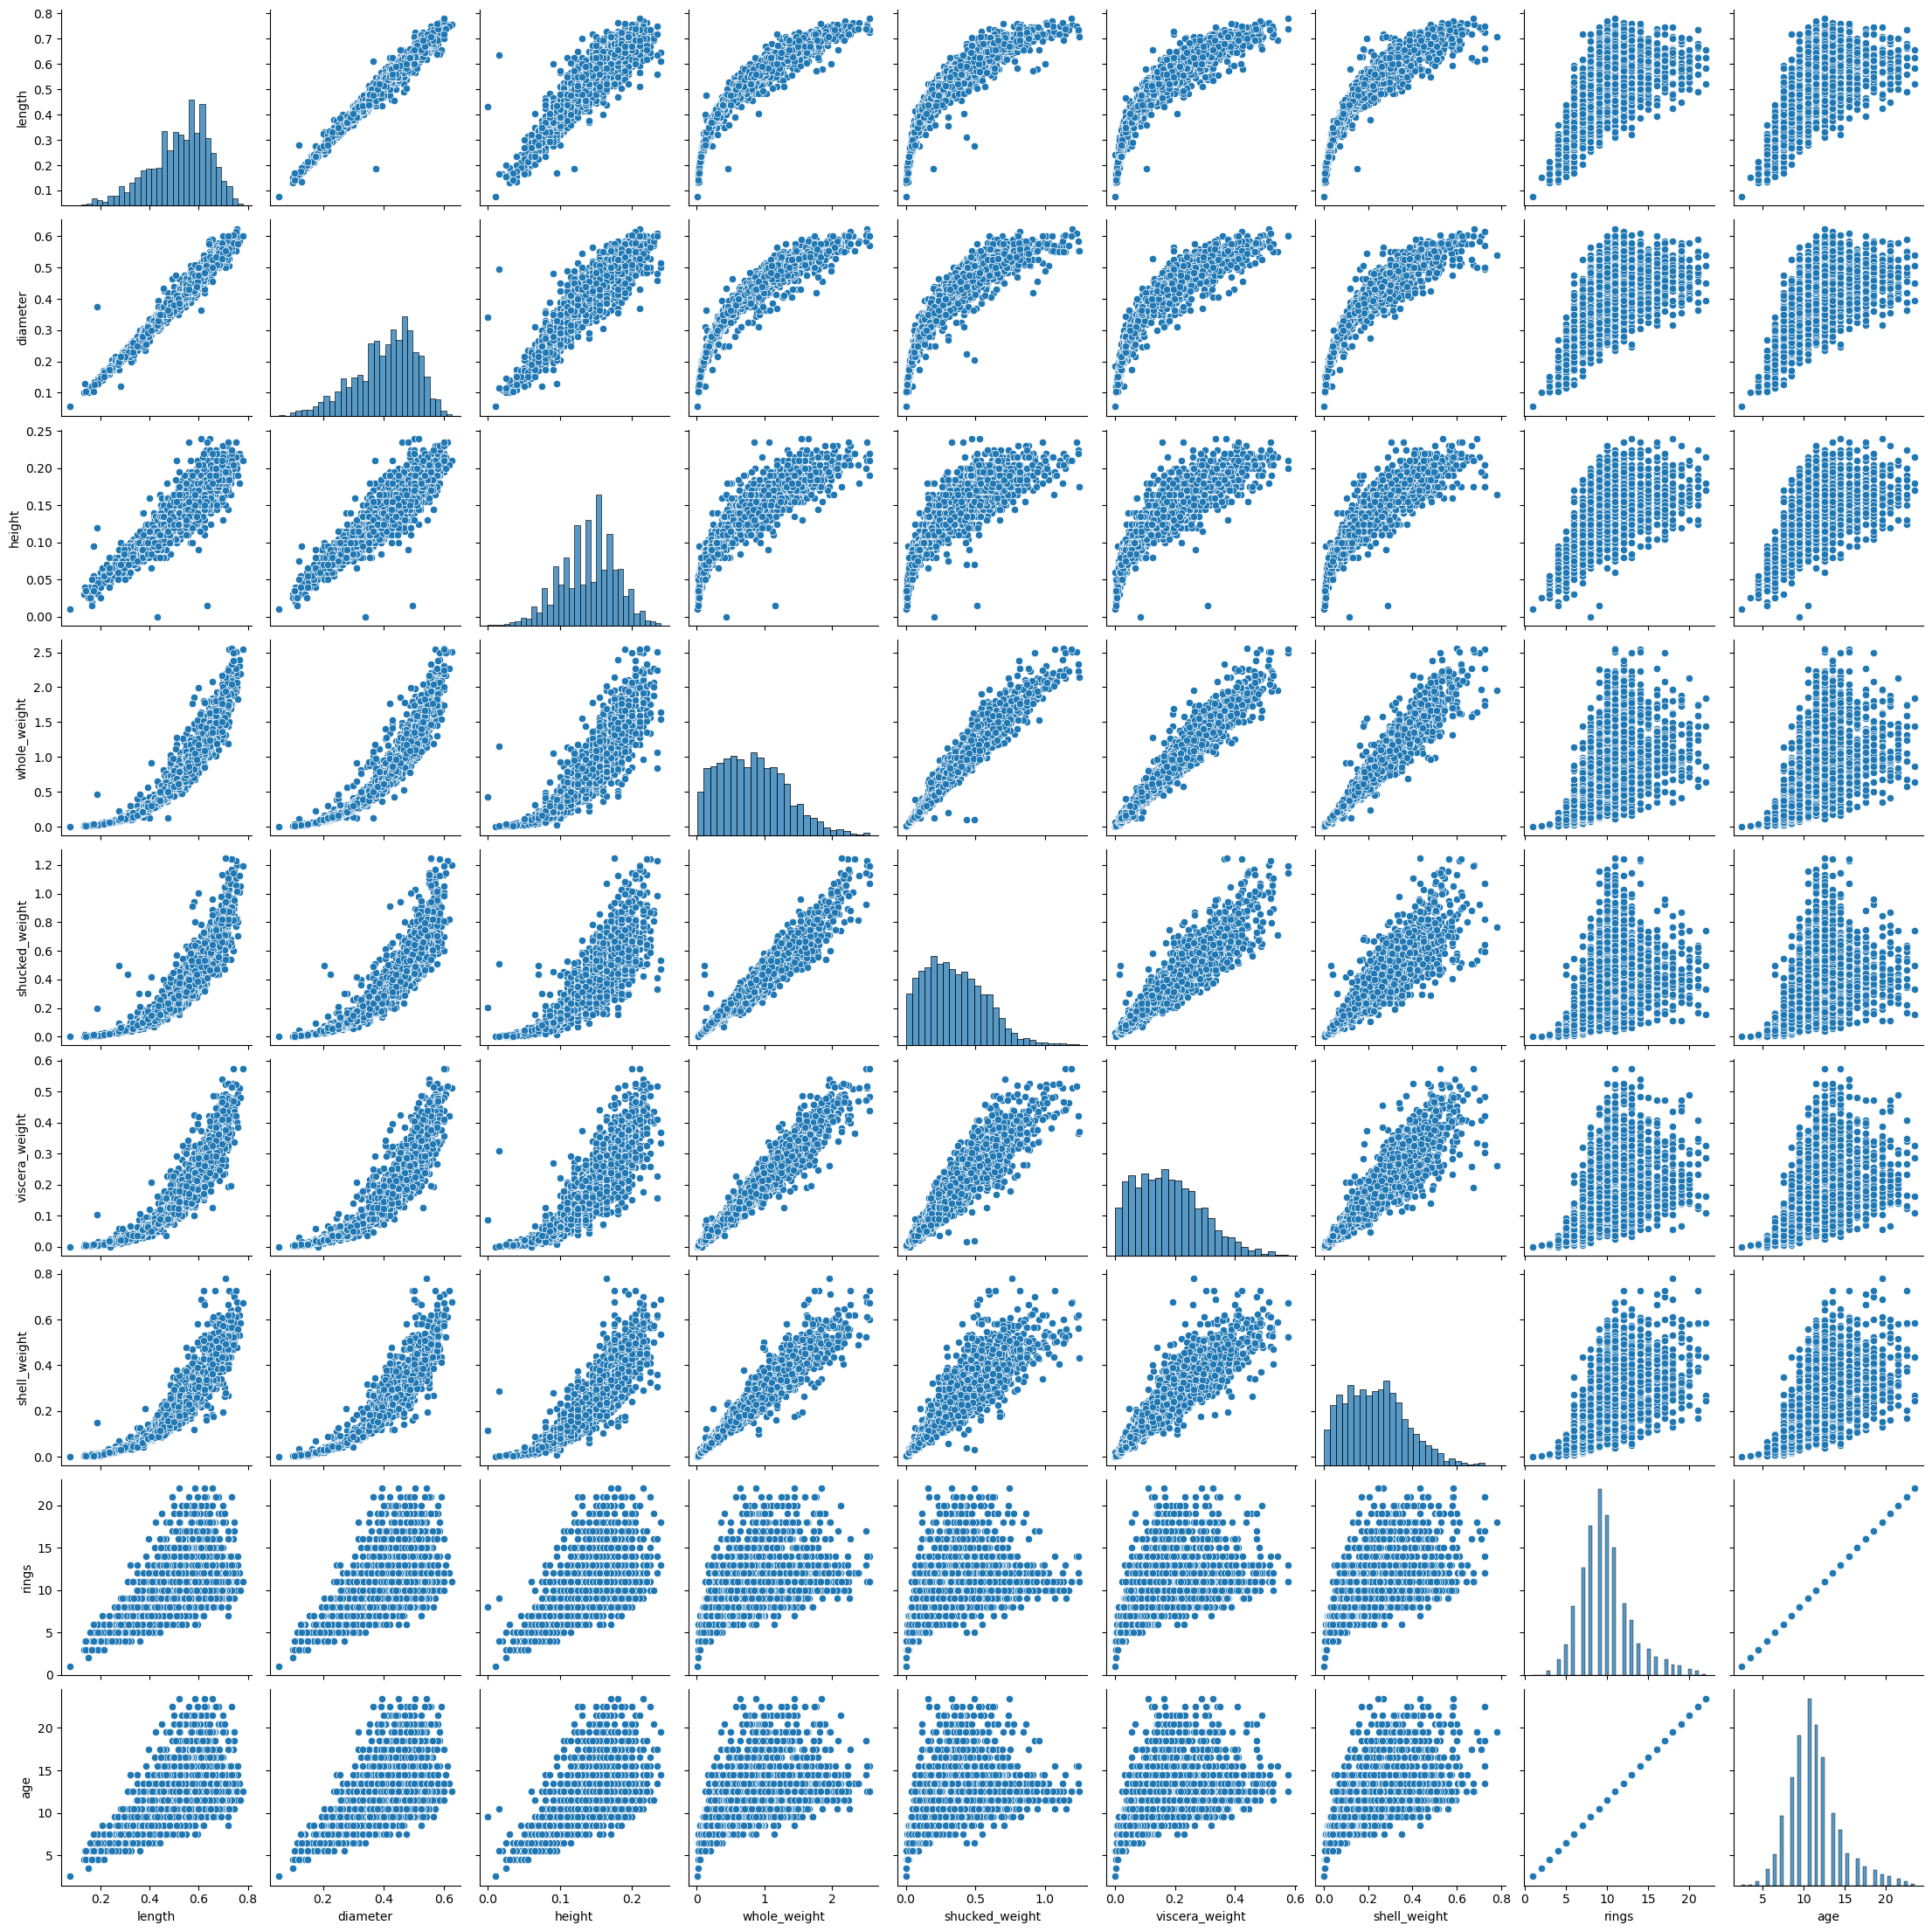

In [15]:
sns.pairplot(data= num);

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [16]:
#Definir los nombres de los archivos
ruta_cat = data['ruta_proyecto']+ '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = data['ruta_proyecto']+ '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [17]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)